## Importação de bibliotecas

In [1]:
# Bibliotecas gerais
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Bibliotecas para árvore de descisões
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Bibliotecas para Randem Forest
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para Regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Conector com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura do Arquivo

In [3]:
# Leitura do arquivo CSV
df_enem = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Performance Enem/exams.csv', sep=',', encoding='iso-8859-1')
df_enem

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


## Cópia para tratamento dos dados

In [4]:
df_enem_2 = pd.DataFrame.copy(df_enem)

## Verificando valores NaN

In [5]:
df_enem_2.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df_enem_2.isna().sum().sum()

0

## Renomeando as colunas

In [7]:
# Alterando o nome das colunas
df_enem_2 = df_enem_2.rename(columns={
    'gender': 'genero', 
    'race/ethnicity' : 'etinia', 
    'parental level of education' :'escolaridade dos pais',
    'lunch' : 'almoco',
    'test preparation course': 'curso preparatorio para testes',
    'math score' : 'pontuacao de matematica',
    'reading score' : 'pontuacao de leitura',
    'writing score' : 'pontuacao escrita'
    });

df_enem_2['total'] = df_enem_2['pontuacao de matematica'] + df_enem_2['pontuacao de leitura'] +  df_enem_2['pontuacao escrita'];


In [8]:
df_enem_2

,genero,etinia,escolaridade dos pais,almoco,curso preparatorio para testes,pontuacao de matematica,pontuacao de leitura,pontuacao escrita,total
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,208
996,male,group D,associate's degree,free/reduced,completed,85,91,92,268
997,female,group C,some high school,free/reduced,none,32,35,41,108
998,female,group C,some college,standard,none,73,74,82,229


## Tratamento dos dados para renomear os valores do arquivo

In [9]:
# Genero
df_enem_2.groupby(['genero']).size()

genero
female    483
male      517
dtype: int64

In [10]:
df_enem_2['genero'].replace({'male':0, 'female': 1}, inplace=True)

In [11]:
# Etnia
df_enem_2.groupby(['etinia']).size()

etinia
group A     79
group B    205
group C    323
group D    262
group E    131
dtype: int64

In [12]:
df_enem_2['etinia'].replace({'group A':0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}, inplace=True)

In [13]:
# Nível escolaridade dos pais
df_enem_2.groupby(['escolaridade dos pais']).size()

escolaridade dos pais
associate's degree    203
bachelor's degree     112
high school           202
master's degree        70
some college          222
some high school      191
dtype: int64

In [14]:
df_enem_2['escolaridade dos pais'].replace({"associate's degree":0, "bachelor's degree": 1, "high school": 2, "master's degree": 3, "some college": 4, "some high school": 5}, inplace=True)

In [15]:
# Almoco
df_enem_2.groupby(['almoco']).size()

almoco
free/reduced    348
standard        652
dtype: int64

In [16]:
df_enem_2['almoco'].replace({'free/reduced':0, 'standard': 1}, inplace=True)

In [17]:
# Preparatorio
df_enem_2.groupby(['curso preparatorio para testes']).size()

curso preparatorio para testes
completed    335
none         665
dtype: int64

In [18]:
df_enem_2['curso preparatorio para testes'].replace({'none':0, 'completed': 1}, inplace=True)

In [19]:
df_enem_2

,genero,etinia,escolaridade dos pais,almoco,curso preparatorio para testes,pontuacao de matematica,pontuacao de leitura,pontuacao escrita,total
0,0,0,2,1,1,67,67,63,197
1,1,3,5,0,0,40,59,55,154
2,0,4,4,0,0,59,60,50,169
3,0,1,2,1,0,77,78,68,223
4,0,4,0,1,1,78,73,68,219
...,...,...,...,...,...,...,...,...,...
995,0,2,2,1,0,73,70,65,208
996,0,3,0,0,1,85,91,92,268
997,1,2,5,0,0,32,35,41,108
998,1,2,4,1,0,73,74,82,229


# **LEGENDA:**
Gender = genero(0 = male; 1 = female)

Race/ethnicity  = etinia(0 = group A; 1 = group B; 2 = group C; 3 = group D; 4 = group E)

Parental level of education = escolaridade dos pais(0 = associate's degree; 1 = bachelor's degree; 2 = high school; 3 = college; 4 = some college; 5 = some high school)	 

Lunch = almoco(0 = free/reduced; 1 = standard)

Test preparation course = curso preparatorio para teste(0 = none; 1 = completed)

Math score = pontuação de matemática 

Reading score = pontuação de leitura 

Writing score = pontuação escrita 

    


In [20]:
# Vizualizando o tipo
df_enem_2.dtypes

genero                            int64
etinia                            int64
escolaridade dos pais             int64
almoco                            int64
curso preparatorio para testes    int64
pontuacao de matematica           int64
pontuacao de leitura              int64
pontuacao escrita                 int64
total                             int64
dtype: object

In [21]:
df_enem_2.shape

(1000, 9)

## *Parametrizações*

In [22]:
# Coluna Etnia até a total, usada como previsores
previsores = df_enem_2.iloc[:, 1:9].values
previsores

array([[  0,   2,   1, ...,  67,  63, 197],
       [  3,   5,   0, ...,  59,  55, 154],
       [  4,   4,   0, ...,  60,  50, 169],
       ...,
       [  2,   5,   0, ...,  35,  41, 108],
       [  2,   4,   1, ...,  74,  82, 229],
       [  0,   4,   1, ...,  60,  62, 187]])

In [23]:
# Alvo: Coluna genero
alvo = df_enem_2.iloc[:, 0].values
alvo

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

## O alvo será o desempenho pelo genero

## ESCALONAMENTO

In [25]:
# Escolanamento (Padronização dos valores)
# Padronizar no mesmo nível de grandeza

previsores_esc = StandardScaler().fit_transform(previsores)
previsores_esc

array([[-1.90926764, -0.31431001,  0.73057671, ..., -0.13591401,
        -0.30385073, -0.14098955],
       [ 0.74126587,  1.34286051, -1.36878165, ..., -0.67902695,
        -0.81689543, -1.12901935],
       [ 1.62477704,  0.79047034, -1.36878165, ..., -0.61113783,
        -1.13754838, -0.78435779],
       ...,
       [-0.1422453 ,  1.34286051, -1.36878165, ..., -2.30836575,
        -1.71472367, -2.18598145],
       [-0.1422453 ,  0.79047034,  0.73057671, ...,  0.33930981,
         0.91463045,  0.59428843],
       [-1.90926764,  0.79047034,  0.73057671, ..., -0.61113783,
        -0.36798132, -0.37076392]])

In [28]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-1.909268,-0.314310,0.730577,1.408927,0.039233,-0.135914,-0.303851,-0.140990
1,0.741266,1.342861,-1.368782,-0.709760,-1.714564,-0.679027,-0.816895,-1.129019
2,1.624777,0.790470,-1.368782,-0.709760,-0.480410,-0.611138,-1.137548,-0.784358
3,-1.025756,-0.314310,0.730577,-0.709760,0.688788,0.610866,0.016802,0.456424
4,1.624777,-1.419090,0.730577,1.408927,0.753743,0.271421,0.016802,0.364514
...,...,...,...,...,...,...,...,...
995,-0.142245,-0.314310,0.730577,-0.709760,0.428966,0.067753,-0.175590,0.111762
996,0.741266,-1.419090,-1.368782,1.408927,1.208431,1.493425,1.555936,1.490408
997,-0.142245,1.342861,-1.368782,-0.709760,-2.234208,-2.308366,-1.714724,-2.185981
998,-0.142245,0.790470,0.730577,-0.709760,0.428966,0.339310,0.914630,0.594288


## **BASE DE TREINO E TESTE**

In [29]:
# Base de teste usado 30% - 0.3
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [34]:
# Previsão
x_treino.shape

(700, 8)

In [35]:
# Previsão
x_teste.shape

(300, 8)

In [36]:
#Real
y_treino.shape

(700,)

In [37]:
#  Real
y_teste.shape

(300,)

# ***Árvore de Descisão***

In [38]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=4)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.9, 'X[6] <= 0.947\nentropy = 0.999\nsamples = 700\nvalue = [364, 336]'),
 Text(0.25, 0.7, 'X[4] <= -0.058\nentropy = 0.985\nsamples = 563\nvalue = [322, 241]'),
 Text(0.125, 0.5, 'X[6] <= -0.4\nentropy = 0.985\nsamples = 332\nvalue = [142, 190]'),
 Text(0.0625, 0.3, 'X[4] <= -1.227\nentropy = 0.971\nsamples = 205\nvalue = [123, 82]'),
 Text(0.03125, 0.1, 'entropy = 0.959\nsamples = 76\nvalue = [29, 47]'),
 Text(0.09375, 0.1, 'entropy = 0.843\nsamples = 129\nvalue = [94, 35]'),
 Text(0.1875, 0.3, 'X[5] <= 0.17\nentropy = 0.609\nsamples = 127\nvalue = [19, 108]'),
 Text(0.15625, 0.1, 'entropy = 0.735\nsamples = 92\nvalue = [19, 73]'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.375, 0.5, 'X[6] <= 0.177\nentropy = 0.762\nsamples = 231\nvalue = [180, 51]'),
 Text(0.3125, 0.3, 'X[4] <= 0.396\nentropy = 0.358\nsamples = 103\nvalue = [96, 7]'),
 Text(0.28125, 0.1, 'entropy = 0.525\nsamples = 59\nvalue = [52, 7]'),
 Text(0.34375, 0.1, 'entropy = 0.

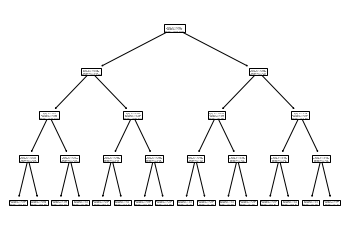

In [39]:
# Plot da árvore
tree.plot_tree(_arvore)

### Dados previstos pela árvore

In [40]:
# Previsões dadas da árvore
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [41]:
y_teste

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [42]:
print("Acurácia de: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia de: 80.33%


In [43]:
confusion_matrix(y_teste, previsoes_arvore)

array([[127,  26],
       [ 33, 114]])

In [44]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       153
           1       0.81      0.78      0.79       147

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [45]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [46]:

# Acurácia cruzada
print("Acurácia cruzada: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))


Acurácia cruzada: 80.43%


In [47]:
confusion_matrix(y_treino, previsoes_treino)

array([[303,  61],
       [ 76, 260]])

# ***Random Forest***

In [67]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=3)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=0)

In [68]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [69]:
y_teste

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [70]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 79.00%


In [71]:
confusion_matrix(y_teste, previsoes_random)

array([[132,  21],
       [ 42, 105]])

In [72]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.83      0.71      0.77       147

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [73]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [74]:
# Acurácia cruzada
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 79.29%


In [75]:
confusion_matrix(y_treino, previsoes_treino)

array([[318,  46],
       [ 99, 237]])

# **Regressão Logística**

In [85]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l1",
                               tol=0.0001, C=2,solver="liblinear")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, penalty='l1', random_state=1,
                   solver='liblinear')

In [86]:
logistica.intercept_

array([-0.04375898])

In [87]:
logistica.coef_

array([[ 0.20430558,  0.32393391,  0.42520785, -1.13752837, -5.61590682,
         0.28048627,  5.62298638,  0.        ]])

In [88]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [89]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 90.33%


In [90]:
confusion_matrix(y_teste, previsoes_logistica)

array([[133,  20],
       [  9, 138]])

In [91]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       153
           1       0.87      0.94      0.90       147

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [92]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [93]:

print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 88.00%


In [94]:
confusion_matrix(y_treino, previsoes_treino)

array([[323,  41],
       [ 43, 293]])

# ***ÁRVORE***

Acurácia:

========| Just right| ======

max_depth = 2 => Árvore de descisões = 67.00% - acertos: 201 e 68,14% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 91 . Previu 147 homens e acertou 110. Errando 33%
- Treinamento: Previu 364 mulheres e acertou 214. Previu 336 homens e acertou 263. Errando 32%

========| Just right| ====== |Escolhido|

max_depth = 4 => Árvore de descisões = 80.33% - acertos: 240 e 80,43% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 127 . Previu 147 homens e acertou 114. Errando 20%
- Treinamento: Previu 364 mulheres e acertou 303. Previu 336 homens e acertou 260. Errando 19,57%

========| Overfitting| ======

max_depth = 6 => Árvore de descisões = 82.00% - acertos: 246 e 87,86% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 125 . Previu 147 homens e acertou 121. Errando 18%
- Treinamento: Previu 364 mulheres e acertou 314. Previu 336 homens e acertou 301. Errando 13,15%

========| Overfitting| ======

max_depth = 16 => Árvore de descisões = 81.33% - acertos: 244 e 100,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 125 . Previu 147 homens e acertou 119. Errando 19%
- Treinamento: Previu 364 mulheres e acertou 364. Previu 336 homens e acertou 336. Errando 0,0%

========| Overfitting| ======
 
max_depth = 23 => Árvore de descisões = 81.33% - acertos: 244 e 100,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 125 . Previu 147 homens e acertou 119. Errando 19%
- Treinamento: Previu 364 mulheres e acertou 364. Previu 336 homens e acertou 336. Errando 0,0%


# **RANDOM FOREST**

Acurácia:

========| Just right| ======

max_depth = 2 => Random Forest = 73.33% - acertos: 219 e 76,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 134 . Previu 147 homens e acertou 86. Errando 27%
- Treinamento: Previu 364 mulheres e acertou 321. Previu 336 homens e acertou 211. Errando 24%

========| Just right| ======|Escolhido|

max_depth = 3 => Random Forest = 79.00% - acertos: 237 e 79,23% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 132 . Previu 147 homens e acertou 105. Errando 21%
- Treinamento: Previu 364 mulheres e acertou 318. Previu 336 homens e acertou 237. Errando 20,77%

========| Overfitting | ====== 

max_depth = 4 => Random Forest = 82.00% - acertos: 246 e 85,29% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 132 . Previu 147 homens e acertou 114. Errando 19%
- Treinamento: Previu 364 mulheres e acertou 326. Previu 336 homens e acertou 271. Errando 14,71%

========| Overfitting| ======

max_depth = 6 => Random Forest = 85.33% - acertos: 255 e 93,14% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 132 . Previu 147 homens e acertou 124. Errando 15%
- Treinamento: Previu 364 mulheres e acertou 346. Previu 336 homens e acertou 306. Errando 7,86%

========| Overfitting| ======

max_depth = 16 => Random Forest = 86.33% - acertos: 256 e 100,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 132 . Previu 147 homens e acertou 127. Errando 14,67%
- Treinamento: Previu 364 mulheres e acertou 364. Previu 336 homens e acertou 336. Errando 0,0%

========| Overfitting| ======
 
max_depth = 23 => Random Forest = 86.33% - acertos: 256 e 100,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 132 . Previu 147 homens e acertou 127. Errando 14,67%
- Treinamento: Previu 364 mulheres e acertou 364. Previu 336 homens e acertou 336. Errando 0,0%

# **REGRESSÃO LOGÍSTICA**

========| Just Right| ======
 
 Regressão Logística = 90.33% - acertos: 270 e 88,00% (validação cruzada):
- Teste: Previu 153 mulheres e acertou 133 . Previu 147 homens e acertou 138. Errando 9,6%
- Treinamento: Previu 364 mulheres e acertou 323. Previu 336 homens e acertou 293. Errando 12%

# ANÁLISE ESCOLHIDA: REGRESSÃO **LOGÍSTICA**